In [9]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [10]:
labels_encoder = {0: "Neutral", 1: "Happy", 2: "Sad", 3:"Surprise", 
                  4: "Fear", 5: "Disgust", 6: "Anger", 7: "Contempt"}

100%|██████████████████████████████| 1150605/1150605 [01:33<00:00, 12293.55it/s]
/home/zian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287651 entries, 0 to 287650
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       287651 non-null  object
 1   1       287651 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 3.3+ MB
None


<AxesSubplot:xlabel='1', ylabel='count'>

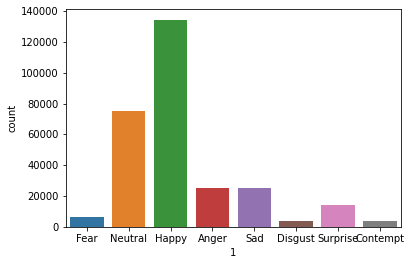

In [11]:
# train set data visualization
labels_dir = './data/train_set/annotations/'
labels_data = []
for filename in tqdm(os.listdir(labels_dir)):
    if filename.endswith('_exp.npy'):
        labels_data.append([filename.replace('_exp.npy','.jpg'), np.load(labels_dir+filename).item()])
labels_df = pd.DataFrame(labels_data)
labels_df[1] = labels_df[1].astype('int32')
print(labels_df.info())

# plot data architecture
sns.countplot(labels_df[1].map(labels_encoder))

/home/zian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='count'>

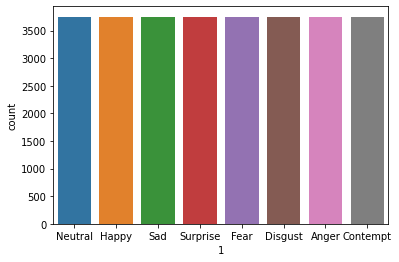

In [12]:
# create a balanced train set for training
# count the min number of samples in each category
min_num = labels_df[1].value_counts().min()
# min_num = 50 # for sanity check

# select the min number of samples in each category
label_0_df = labels_df[labels_df[1]==0].iloc[:min_num]
label_1_df = labels_df[labels_df[1]==1].iloc[:min_num]
label_2_df = labels_df[labels_df[1]==2].iloc[:min_num]
label_3_df = labels_df[labels_df[1]==3].iloc[:min_num]
label_4_df = labels_df[labels_df[1]==4].iloc[:min_num]
label_5_df = labels_df[labels_df[1]==5].iloc[:min_num]
label_6_df = labels_df[labels_df[1]==6].iloc[:min_num]
label_7_df = labels_df[labels_df[1]==7].iloc[:min_num]

# create a balanced dataframe
balanced_df = pd.concat([label_0_df,label_1_df,label_2_df,label_3_df,
                         label_4_df,label_5_df,label_6_df,label_7_df])

# plot data architecture
sns.countplot(balanced_df[1].map(labels_encoder))

In [5]:
balanced_df.to_csv(labels_dir+'labels.csv', index=False)
print("labels.csv created at "+labels_dir)

labels.csv created at ./data/train_set/annotations/


100%|██████████████████████████████████| 15997/15997 [00:01<00:00, 10029.75it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3999 non-null   object
 1   1       3999 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 47.0+ KB
None



/home/zian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='count'>

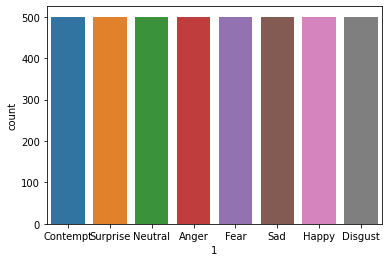

In [6]:
# valid set data visualization
labels_dir = './data/val_set/annotations/'
labels_data = []
for filename in tqdm(os.listdir(labels_dir)):
    if filename.endswith('_exp.npy'):
        labels_data.append([filename.replace('_exp.npy','.jpg'), np.load(labels_dir+filename).item()])
labels_df = pd.DataFrame(labels_data)
labels_df[1] = labels_df[1].astype('int32')
print(labels_df.info())

# plot data architecture
sns.countplot(labels_df[1].map(labels_encoder))

/home/zian/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='count'>

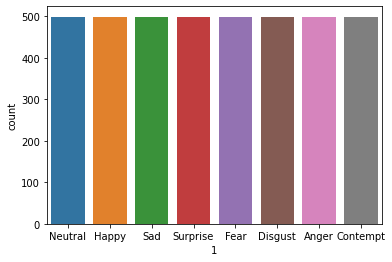

In [7]:
# create a balanced val set for validation
# count the min number of samples in each category
min_num = labels_df[1].value_counts().min()

# select the min number of samples in each category
label_0_df = labels_df[labels_df[1]==0].iloc[:min_num]
label_1_df = labels_df[labels_df[1]==1].iloc[:min_num]
label_2_df = labels_df[labels_df[1]==2].iloc[:min_num]
label_3_df = labels_df[labels_df[1]==3].iloc[:min_num]
label_4_df = labels_df[labels_df[1]==4].iloc[:min_num]
label_5_df = labels_df[labels_df[1]==5].iloc[:min_num]
label_6_df = labels_df[labels_df[1]==6].iloc[:min_num]
label_7_df = labels_df[labels_df[1]==7].iloc[:min_num]

# create a balanced dataframe
balanced_df = pd.concat([label_0_df,label_1_df,label_2_df,label_3_df,
                         label_4_df,label_5_df,label_6_df,label_7_df])

# plot data architecture
sns.countplot(balanced_df[1].map(labels_encoder))

In [8]:
balanced_df.to_csv(labels_dir+'labels.csv', index=False)
print("labels.csv created at "+labels_dir)

labels.csv created at ./data/val_set/annotations/
